In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra

## Room creation

(-1, 4)

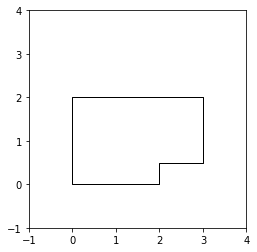

In [21]:
corners = np.array([[0,0],[0,2],[3,2],[3,0.5],[2,0.5],[2,0]]).T
room = pra.Room.from_corners(corners)
#room.extrude(3.0)
fig,ax = room.plot()
ax.set_xlim([-1, 4])
ax.set_ylim([-1, 4])
#ax.set_zlim([0, 5]);

## Sound Sources and Micros

### Sound source

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


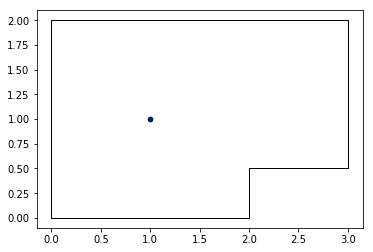

In [22]:
folder_path = "/Users/youssef/Documents/EPFL/Semester_Project/pyroomacoustics_master/notebooks/"
file_to_open = folder_path + "arctic_a0010.wav"
fs , signal = wavfile.read(file_to_open)
#check the content of fs and signal.

room = pra.Room.from_corners(corners,fs=fs)
room.add_source([1,1],signal=signal)

fig , ax = room.plot()



### Microphones

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


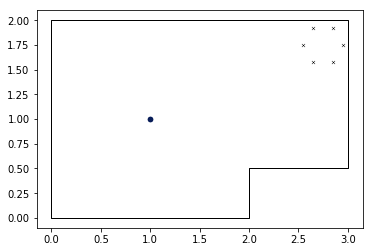

In [23]:
mic = pra.circular_2D_array(center = [2.75,1.75] , M=6, phi0=0, radius=0.2)
#check the meaning of M and phi0
room.add_microphone_array(pra.MicrophoneArray(mic,room.fs))
fig , ax = room.plot()




### Room impulse responses

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


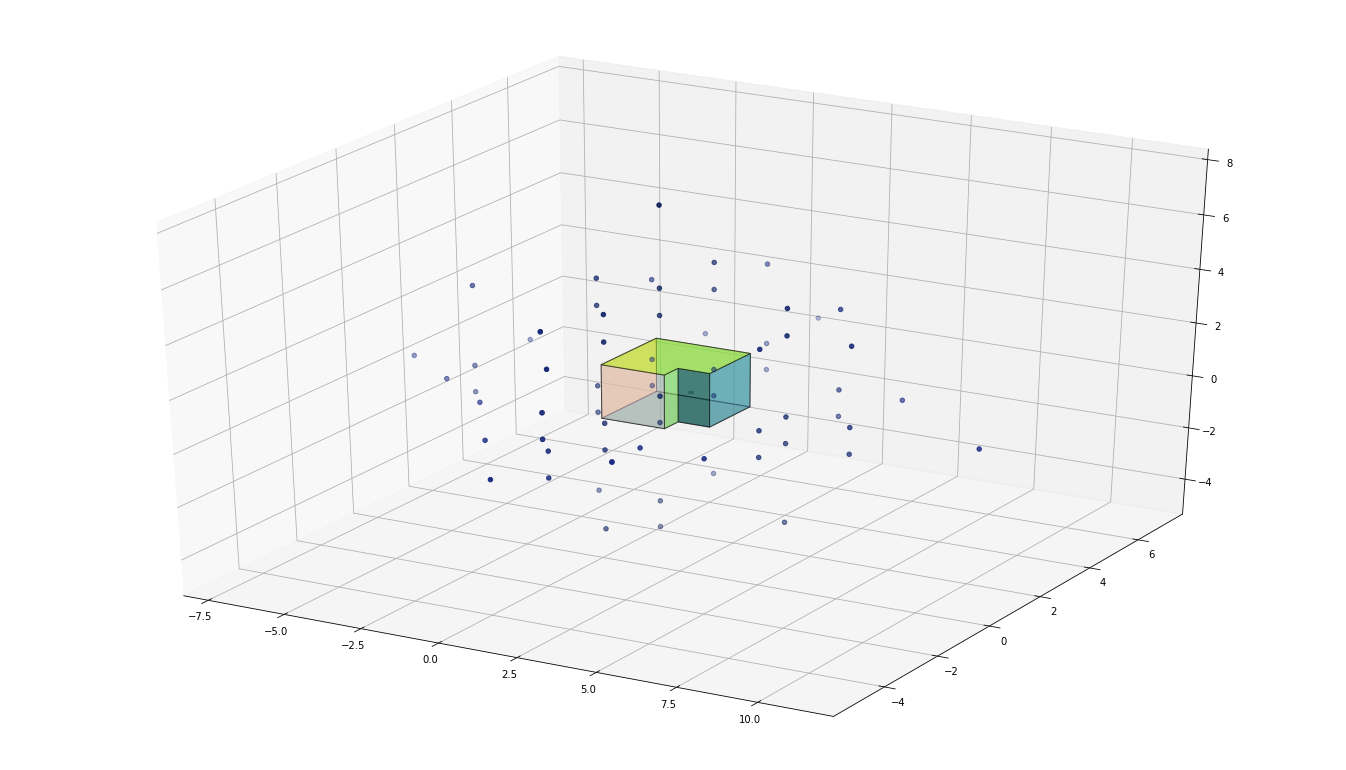

In [26]:
fs,signal = wavfile.read(file_to_open)

room = room.from_corners(corners, fs=fs , max_order=8 ,absorption=0.2)
#Understand the specifics of max_orders
room.extrude(2.)

room.add_source([1.,1.,0.5], signal=signal)
mic = np.array([[1.5,1.6],[1.5,1.5],[0.5,0.5]])
room.add_microphone_array(pra.MicrophoneArray(mic,room.fs))

room.image_source_model(use_libroom=True)
#Check what's use_libroom ?

#Visualization
fig, ax = room.plot(img_order=3)
fig.set_size_inches(18.5,10.5)




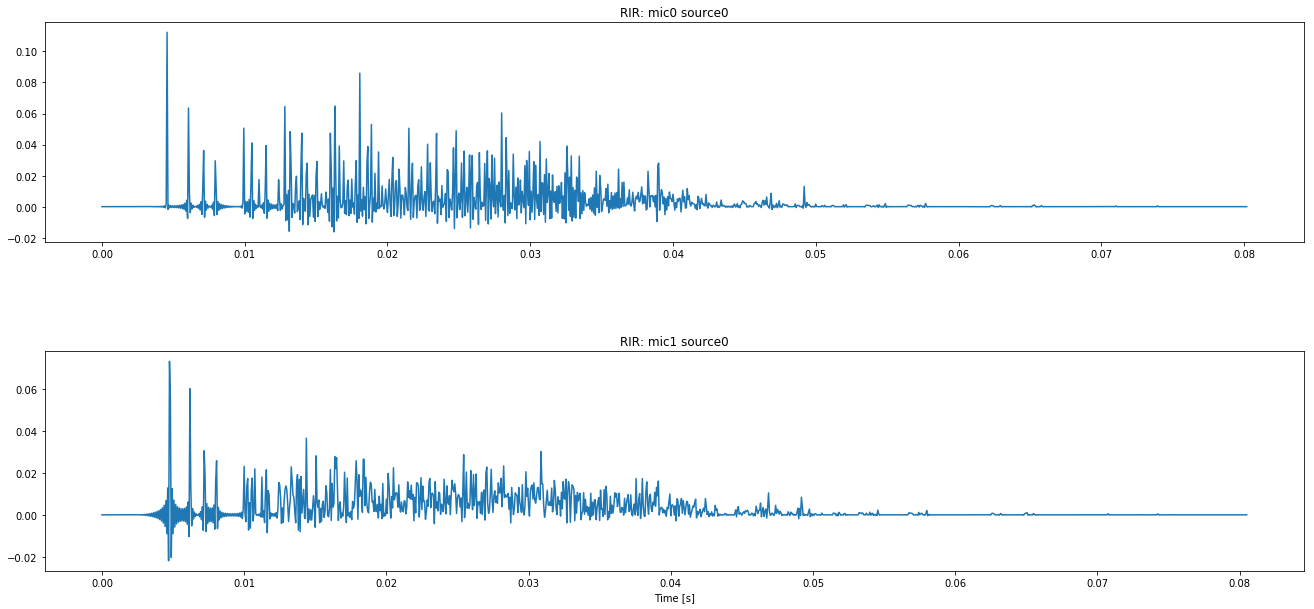

In [27]:
#Plotting the RIR for each microphone
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)
#What is the y axis in theses plots?



In [28]:
#Simulation of the convolved signal with the impulse reponses of each microphone
room.simulate()
print(room.mic_array.signals.shape)
#what represents room.mic_array.signals?

(2, 58328)


In [29]:
#We create and audio for the output of our simulation
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

Original WAV:


In [30]:
print("Simulated propagation to 1st mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

Simulated propagation to 1st mic:


In [31]:
print("Simulated propagation to 2nd mic:")
IPython.display.Audio(room.mic_array.signals[1,:], rate=fs)

Simulated propagation to 2nd mic:


In [32]:
#Noticing no difference between the simulation captured by the first and the second mic ,which normal both mic are very close to each other in this simulation,but very robotic compared to the original WAV